# **ВЫПУСКНАЯ КВАЛИФИКАЦИОННАЯ РАБОТА по курсу «Data Science»**

 **Прогнозирование конечных свойств новых материалов
            (композиционных материалов)**



Предметом настоящей работы является построение моделей прогнозирования следующих свойств композиционных материалов:


*   модуля упругости при растяжении,
*   прочности при растяжении,
*   соотношения матрица-наполнитель.

In [1]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate

import tensorflow as tf
from tensorflow import keras

# Подготовка данных

In [2]:
from google.colab import files

In [3]:
# Считывание данных первого датасета и вывод первых пяти его строк
dataset_1 = pd.read_excel('/content/X_bp.xlsx')
dataset_1.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0         0.0                         1.857143            2030.0   
1         1.0                         1.857143            2030.0   
2         2.0                         1.857143            2030.0   
3         3.0                         1.857143            2030.0   
4         4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [4]:
# Считывание данных второго датасета и вывод первых пяти его строк
dataset_2 = pd.read_excel('/content/X_nup.xlsx')
dataset_2.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0         0.0                 0.0          4.0               57.0
1         1.0                 0.0          4.0               60.0
2         2.0                 0.0          4.0               70.0
3         3.0                 0.0          5.0               47.0
4         4.0                 0.0          5.0               57.0

In [5]:
# Объединение двух датасетов в один по индексу (тип объединения INNER) и вывод первых пяти его строк
dataset = dataset_1.merge(dataset_2, how='inner')
dataset.drop(['Unnamed: 0'], inplace=True, axis=1)
dataset

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [6]:
data = dataset.copy()
data

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [7]:
# Получение сведений о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [8]:
# Проверка датасета на пропуски
data.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [9]:
# Проверка датасета на наличие дубликатов
data.duplicated().sum()

0

In [10]:
# Описательная статистика для каждой колонки датасета (число значений, среднее значение, стандартное отклонение, 
# минимальное значение, верхнее значение первого квартиля, медианное значение, верхнее значение третьего квартиля,
# максимальное значение)
data.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

# Разведочный анализ данных

In [11]:
# Гистограммы распределения
i = 1
plt.figure(figsize = (20,20))
plt.style.use('ggplot')
for col in data.columns:
    plt.subplot(5,3,i)
    sns.histplot(data[col], color = 'green', kde = True)
    i = i + 1
plt.show()

In [12]:
# Диаграммы "ящик с усами"
i = 1
plt.figure(figsize = (20,30))
plt.style.use('ggplot')
for col in data.columns:
    plt.subplot(7,2,i)
    plt.xlabel(col, fontsize = 16)
    plt.boxplot(data[col], patch_artist = True, vert = False, widths = 0.3)
    i = i + 1
plt.show()

In [13]:
# Визуализация корреляций между переменными с помощью матрицы диаграмм рассеяния
columns_list = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
                'модуль упругости, ГПа', 'Количество отвердителя, м.%',
                'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
                'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
                'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
                'Шаг нашивки', 'Плотность нашивки']

plt.style.use('ggplot')
sns.pairplot(data[columns_list], height = 6, diag_kind = 'kde');

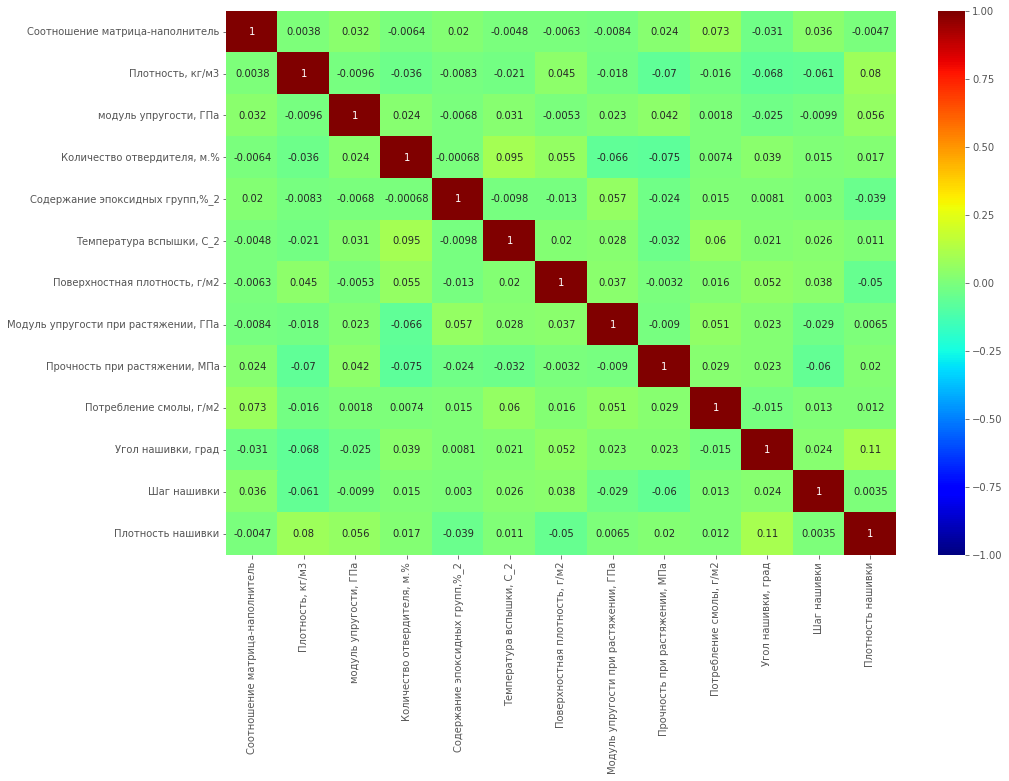

In [14]:
plt.figure(figsize = (15,10))
plt.style.use('ggplot')
# Отображение взаимосвязей между переменными с помощью тепловой карты
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'jet');

# Предобработка данных

### Удаление выбросов на основе межквартильного расстояния

In [15]:
data_wd0 = data.copy()
for x in columns_list:
    q75,q25 = np.percentile(data_wd0.loc[:,x],[75,25]) # расчет первого и третьего квартиля
    intr_qr = q75-q25 # подсчет межквартильного диапазона

    min = q25-(1.5*intr_qr) # подсчет нижней границы
    max = q75+(1.5*intr_qr) # подсчет верхней границы

    data_wd0.loc[data_wd0[x] < min,x] = np.nan # значения, находящихся вне отрезка [min,max], заменяем на NaN
    data_wd0.loc[data_wd0[x] > max,x] = np.nan 
    
data_wd0.isnull().sum() # сумма NaN-значений в каждом столбце набора данных

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [16]:
data_wd0 = data_wd0.dropna(axis = 0) # удаление выбросов
data_wd0.isnull().sum() # сумма NaN-значений в каждом столбце набора данных

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

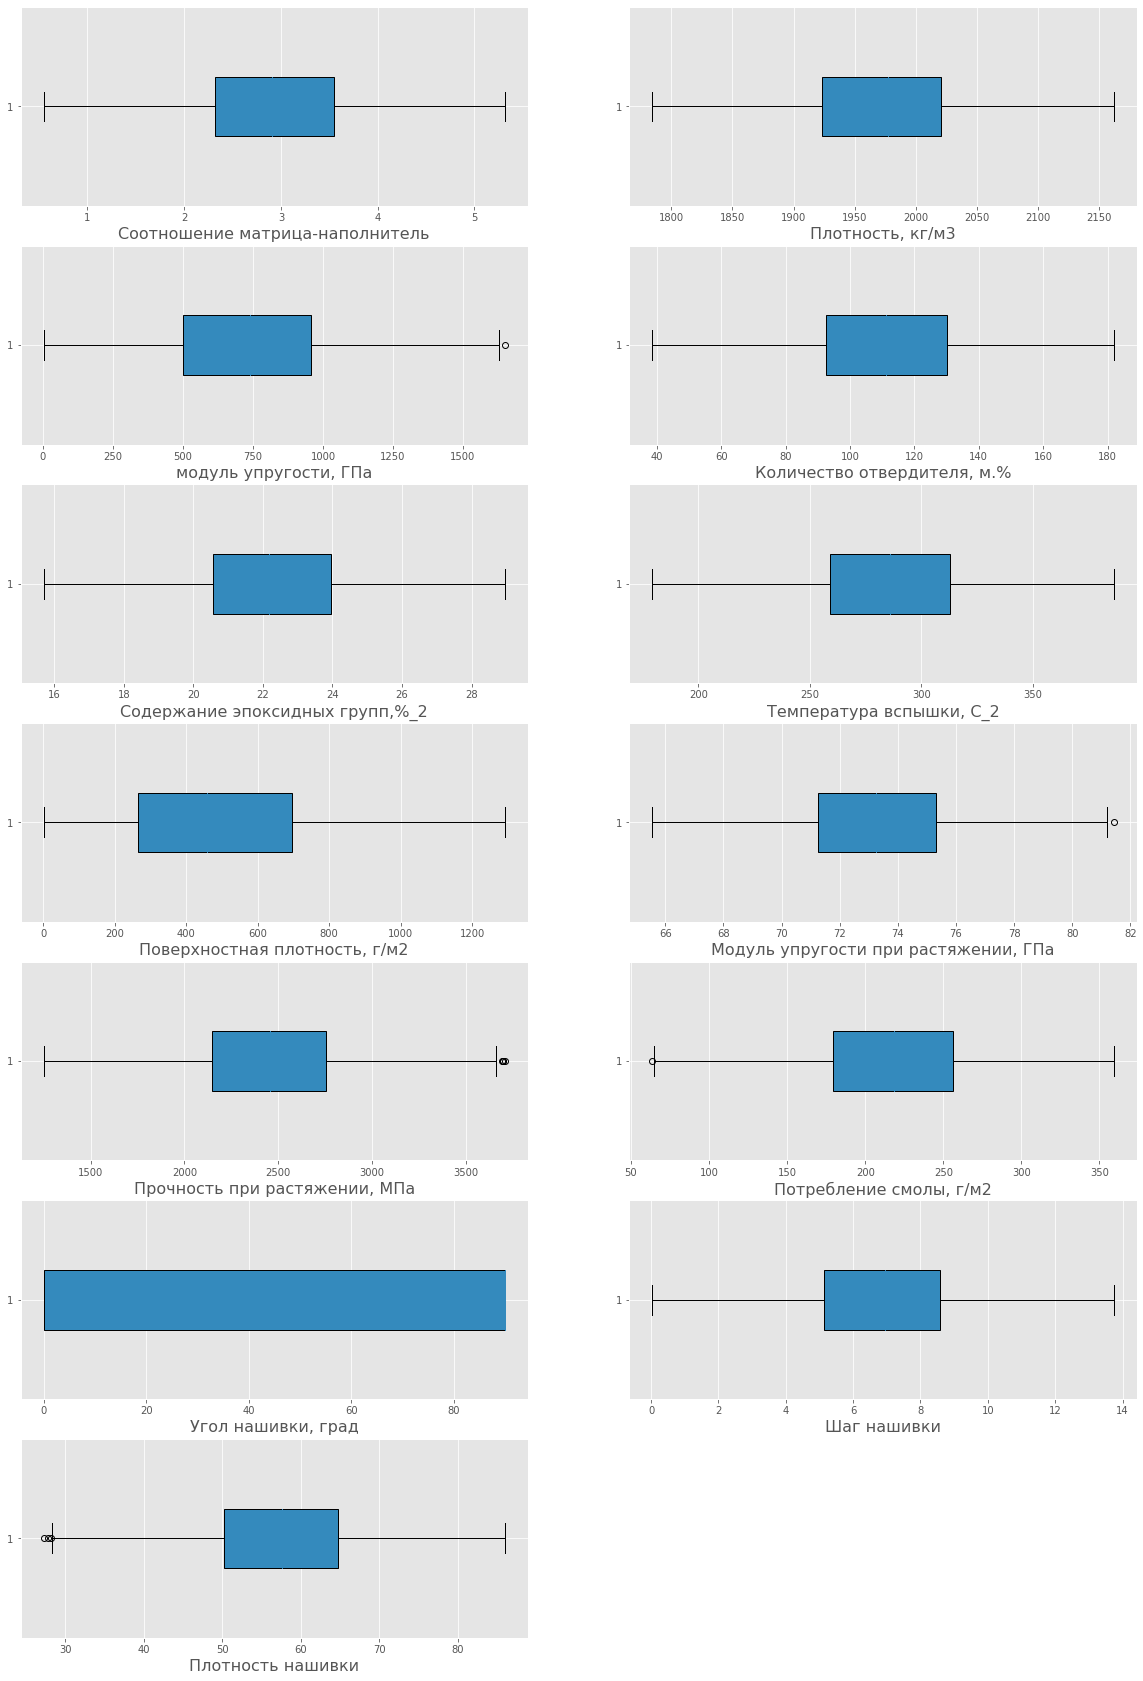

In [17]:
i = 1
plt.figure(figsize = (20,30))
plt.style.use('ggplot')
for col in data_wd0.columns:
    plt.subplot(7,2,i)
    plt.xlabel(col, fontsize = 16)
    plt.boxplot(data_wd0[col], patch_artist = True, vert = False, widths = 0.3)
    i = i + 1
plt.show()

Повторное удаление выбросов

In [18]:
# столбцы с выбросами
columns_list_drop1 = ['модуль упругости, ГПа', 
                    'Модуль упругости при растяжении, ГПа',
                    'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
                    'Плотность нашивки']

In [19]:
data_wd1 = data_wd0.copy()
for x in columns_list_drop1:
    q75,q25 = np.percentile(data_wd1.loc[:,x],[75,25]) # расчет первого и третьего квартиля
    intr_qr = q75-q25 # подсчет межквартильного диапазона

    min = q25-(1.5*intr_qr) # подсчет нижней границы
    max = q75+(1.5*intr_qr) # подсчет верхней границы

    data_wd1.loc[data_wd1[x] < min,x] = np.nan # значения, находящихся вне отрезка [min,max], заменяем на NaN
    data_wd1.loc[data_wd1[x] > max,x] = np.nan 
    
data_wd1.isnull().sum(); # сумма NaN-значений в каждом столбце набора данных

In [20]:
data_wd1 = data_wd1.dropna(axis = 0) # удаление выбросов
data_wd1.isnull().sum() # сумма NaN-значений в каждом столбце набора данных

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

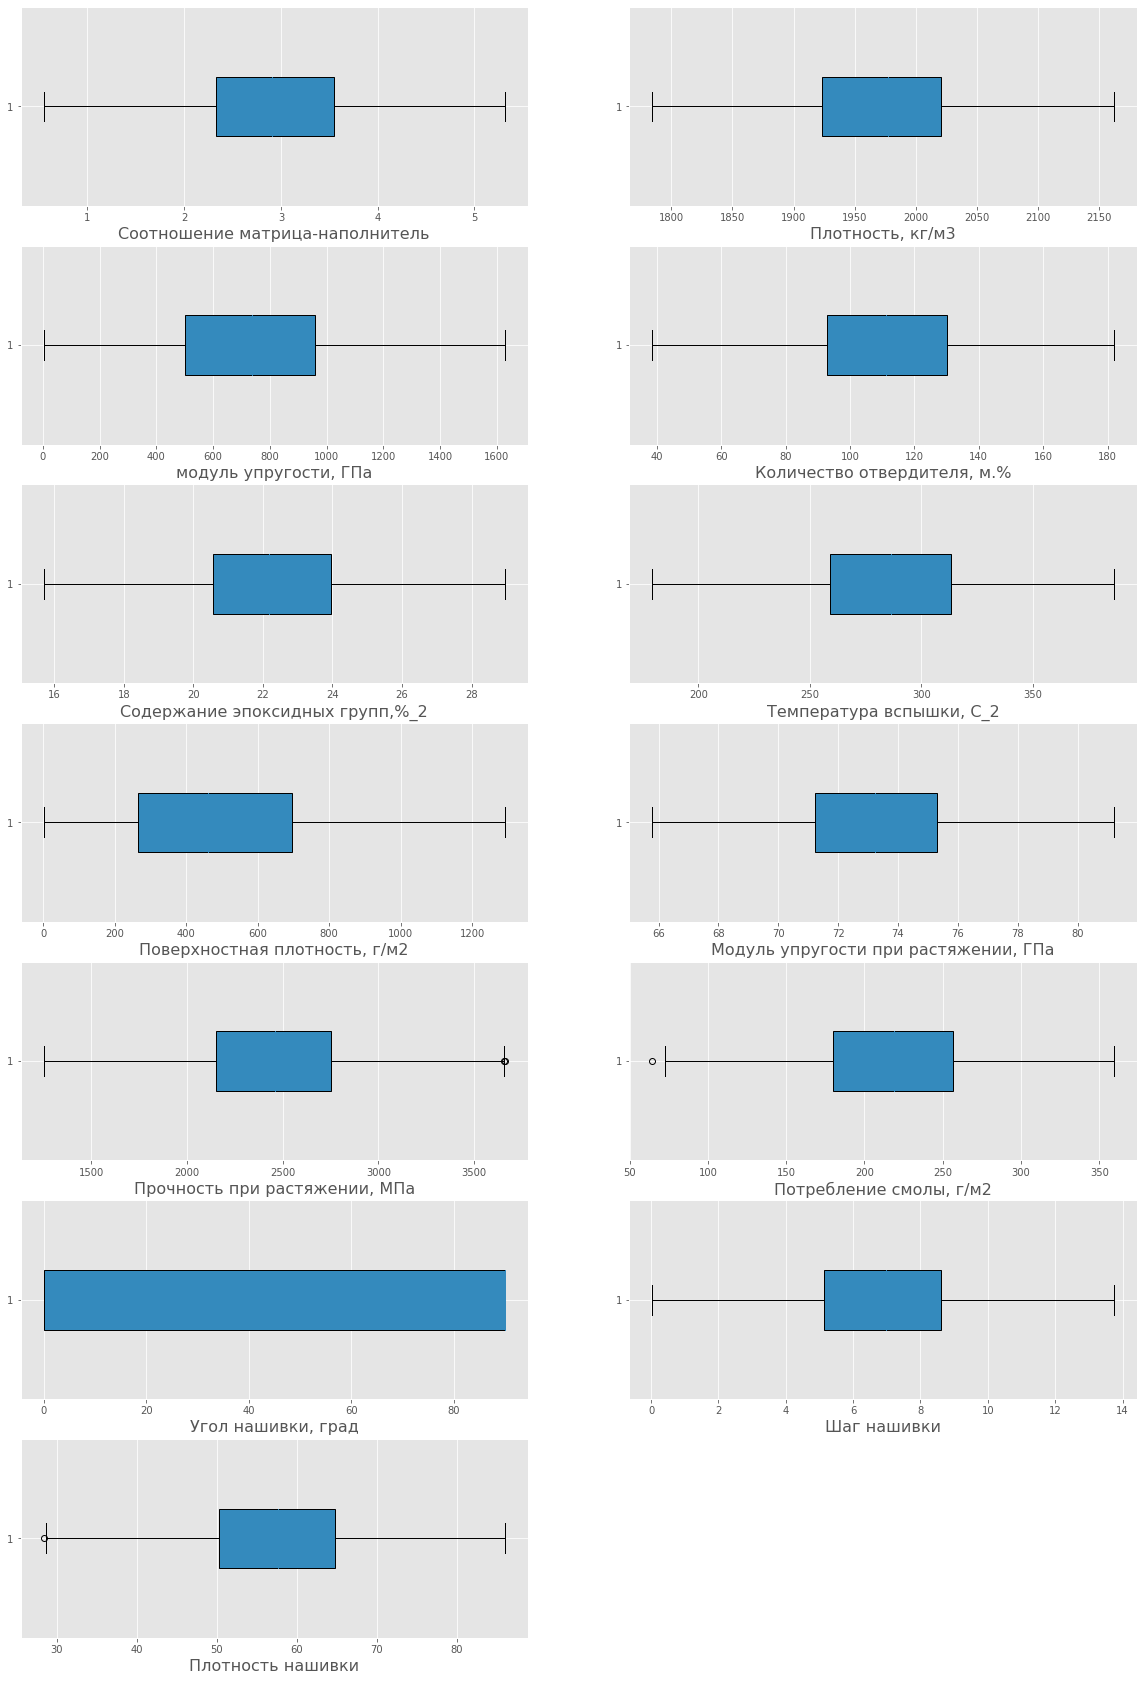

In [21]:
i = 1
plt.figure(figsize = (20,30))
plt.style.use('ggplot')
for col in data_wd1.columns:
    plt.subplot(7,2,i)
    plt.xlabel(col, fontsize = 16)
    plt.boxplot(data_wd1[col], patch_artist = True, vert = False, widths = 0.3)
    i = i + 1
plt.show()

Повторное удаление выбросов

In [22]:
# столбцы с выбросами
columns_list_drop2 = ['Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
                    'Плотность нашивки']

In [23]:
data_wd2 = data_wd1.copy()
for x in columns_list_drop2:
    q75,q25 = np.percentile(data_wd2.loc[:,x],[75,25]) # расчет первого и третьего квартиля
    intr_qr = q75-q25 # подсчет межквартильного диапазона

    min = q25-(1.5*intr_qr) # подсчет нижней границы
    max = q75+(1.5*intr_qr) # подсчет верхней границы

    data_wd2.loc[data_wd2[x] < min,x] = np.nan # значения, находящихся вне отрезка [min,max], заменяем на NaN
    data_wd2.loc[data_wd2[x] > max,x] = np.nan 
    
data_wd2.isnull().sum() # сумма NaN-значений в каждом столбце набора данных

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           2
Потребление смолы, г/м2                 1
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       1
dtype: int64

In [24]:
data_wd2 = data_wd2.dropna(axis = 0) # удаление выбросов
data_wd2.isnull().sum() # сумма NaN-значений в каждом столбце набора данных

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

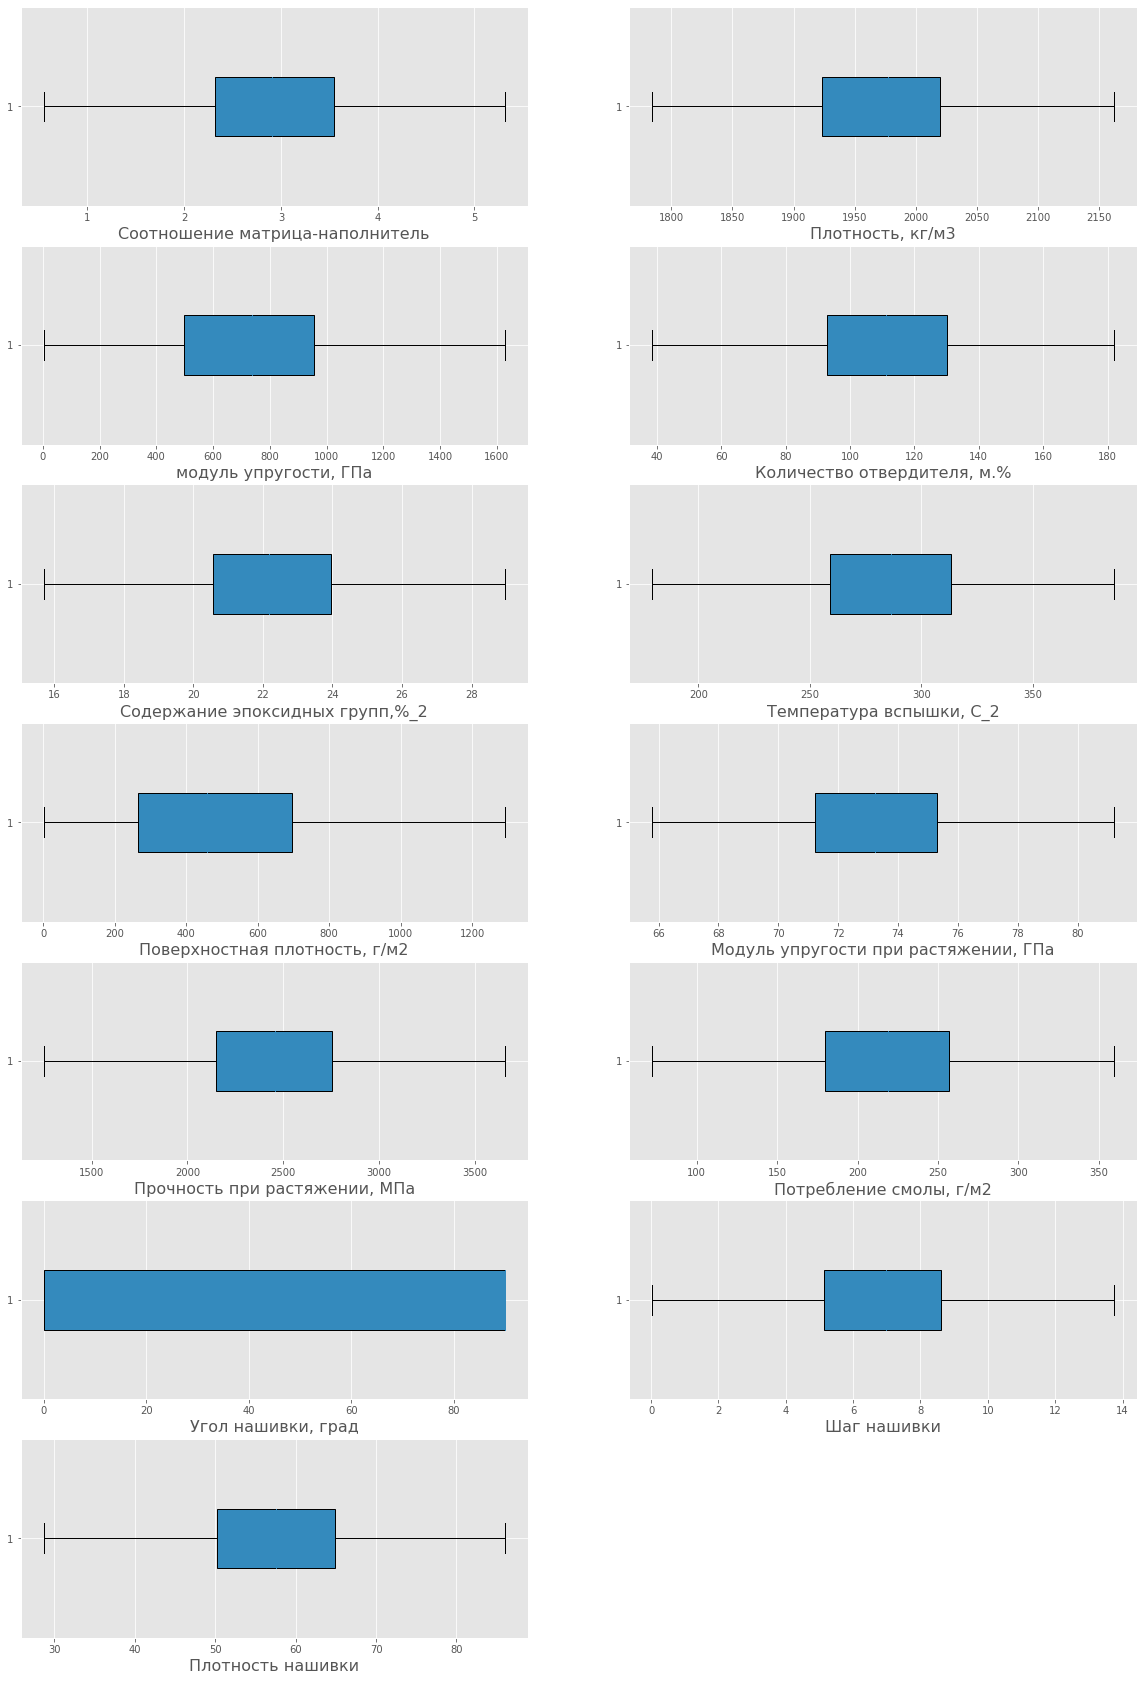

In [25]:
i = 1
plt.figure(figsize = (20,30))
plt.style.use('ggplot')
for col in data_wd2.columns:
    plt.subplot(7,2,i)
    plt.xlabel(col, fontsize = 16)
    plt.boxplot(data_wd2[col], patch_artist = True, vert = False, widths = 0.3)
    i = i + 1
plt.show()

### Нормализация данных

In [26]:
data_prep = data_wd2.copy()
# Нормализация обработанного датасета
MinMax_scaler = MinMaxScaler()
col = data_prep.columns
result = MinMax_scaler.fit_transform(data_prep)
data_norm = pd.DataFrame(result, columns = col)
data_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.274768          0.651097               0.452951   
1                           0.274768          0.651097               0.452951   
2                           0.466552          0.651097               0.461725   
3                           0.465836          0.571539               0.458649   
4                           0.424236          0.332865               0.494944   
..                               ...               ...                    ...   
917                         0.361662          0.444480               0.560064   
918                         0.607674          0.704373               0.272088   
919                         0.573391          0.498274               0.254927   
920                         0.662497          0.748688               0.454635   
921                         0.684036          0.280923               0.255222   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.079153                         0.607435   
1                       0.630983                         0.418887   
2                       0.511257                         0.495653   
3                       0.511257                         0.495653   
4                       0.511257                         0.495653   
..                           ...                              ...   
917                     0.337550                         0.333908   
918                     0.749605                         0.294428   
919                     0.501991                         0.623085   
920                     0.717585                         0.267818   
921                     0.632264                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.509164                       0.162230   
1                    0.583596                       0.162230   
2                    0.509164                       0.162230   
3                    0.509164                       0.162230   
4                    0.509164                       0.162230   
..                        ...                            ...   
917                  0.703458                       0.161609   
918                  0.362087                       0.271207   
919                  0.334063                       0.572959   
920                  0.466417                       0.496511   
921                  0.588206                       0.587373   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.272962                       0.727777   
1                                0.272962                       0.727777   
2                                0.272962                       0.727777   
3                                0.272962                       0.727777   
4                                0.272962                       0.727777   
..                                    ...                            ...   
917                              0.473553                       0.472912   
918                              0.462512                       0.461722   
919                              0.580201                       0.587558   
920                              0.535317                       0.341643   
921                              0.552644                       0.668015   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.514688                 0.0     0.289334   
1                   0.514688                 0.0     0.362355   
2                   0.514688                 0.0     0.362355   
3                   0.514688                 0.0     0.362355   
4                   0.514688                 0.0     0.362355   
..                       ...                 ...          ...   
917                 0.183151                 1.0     0.660014   
9

In [27]:
# Описательная статистика для каждой колонки обработанного и нормализованного датасета
data_norm.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       922.0  0.499412  0.187858  0.0   
Плотность, кг/м3                      922.0  0.502904  0.188395  0.0   
модуль упругости, ГПа                 922.0  0.451341  0.201534  0.0   
Количество отвердителя, м.%           922.0  0.506200  0.186876  0.0   
Содержание эпоксидных групп,%_2       922.0  0.490578  0.180548  0.0   
Температура вспышки, С_2              922.0  0.516739  0.190721  0.0   
Поверхностная плотность, г/м2         922.0  0.373295  0.217269  0.0   
Модуль упругости при растяжении, ГПа  922.0  0.487343  0.196366  0.0   
Прочность при растяжении, МПа         922.0  0.503776  0.188668  0.0   
Потребление смолы, г/м2               922.0  0.507876  0.199418  0.0   
Угол нашивки, град                    922.0  0.510846  0.500154  0.0   
Шаг нашивки                           922.0  0.503426  0.183587  0.0   
Плотность нашивки                     922.0  0.503938  0.193933  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.371909  0.495189  0.629774  1.0  
Плотность, кг/м3                      0.368184  0.511396  0.624719  1.0  
модуль упругости, ГПа                 0.305188  0.451377  0.587193  1.0  
Количество отвердителя, м.%           0.378514  0.506382  0.638735  1.0  
Содержание эпоксидных групп,%_2       0.366571  0.488852  0.623046  1.0  
Температура вспышки, С_2              0.386228  0.516931  0.646553  1.0  
Поверхностная плотность, г/м2         0.204335  0.354161  0.538397  1.0  
Модуль упругости при растяжении, ГПа  0.353512  0.483718  0.617568  1.0  
Прочность при растяжении, МПа         0.373447  0.501481  0.624299  1.0  
Потребление смолы, г/м2               0.374647  0.510143  0.642511  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.372844  0.506414  0.626112  1.0  
Плотность нашивки                     0.376869  0.504310  0.630842  1.0

# Построение и обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении

In [28]:
# Определение входных и выходных данных
# Деление дасета на набор входных данных X и (выходных данных y - выделение в отдельную переменную)
data_in = data_norm.copy()
data_out1 = data_in.pop('Модуль упругости при растяжении, ГПа') 
data_out2 = data_in.pop('Прочность при растяжении, МПа') 

In [162]:
# Тестовая и обучающая выборки в соотношении 70:30
x_train1, x_test1, y_train1, y_test1 = train_test_split(data_in, data_out1, test_size=0.3, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_in, data_out2, test_size=0.3, random_state=42)

## Прогноз модуля упругости при растяжении

In [30]:
# Функция для расчета средней абсолютной ошибки
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Функция обучения и оценки модели на тестовом наборе
def fit_and_evaluate(model):
    model.fit(x_train1, y_train1) # обучение модели 
    model_pred = model.predict(x_test1) # прогноз
    model_mae = mae(y_test1, model_pred) # оценка точности прогноза
    return model_mae

Список моделей:
    
Lasso() - линейная модель, прошедшая обучение с L1 в качестве регулятора (он же Лассо);

RandomForestRegressor() - случайный лес;

GradientBoostingRegressor() - метод градиентного бустинга;

KNeighborsRegressor() - метод k-ближайших соседей;

SVR() - метод опорных векторов

In [31]:
ls = Lasso()
ls_mae = fit_and_evaluate(ls)
print('Средняя абсолютная ошибка модели Lasso на тестовом наборе: MAE = %0.4f' % ls_mae)

random_forest = RandomForestRegressor(random_state=42)
random_forest_mae = fit_and_evaluate(random_forest)
print('Средняя абсолютная ошибка модели Random Forest Regression на тестовом наборе: MAE = %0.4f' % random_forest_mae)

gradient_boost = GradientBoostingRegressor(random_state=42)
gradient_boost_mae = fit_and_evaluate(gradient_boost)
print('Средняя абсолютная ошибка модели Gradient Boosting Regression на тестовом наборе: MAE = %0.4f' % gradient_boost_mae)

knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)
print('Средняя абсолютная ошибка модели K-Nearest Neighbors Regression на тестовом наборе данных: MAE = %0.4f' % knn_mae)

svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)
print('Средняя абсолютная ошибка модели Support Vector Machine Regression на тестовом наборе: MAE = %0.4f' % svm_mae)

Средняя абсолютная ошибка модели Lasso на тестовом наборе: MAE = 0.1674
Средняя абсолютная ошибка модели Random Forest Regression на тестовом наборе: MAE = 0.1687
Средняя абсолютная ошибка модели Gradient Boosting Regression на тестовом наборе: MAE = 0.1747
Средняя абсолютная ошибка модели K-Nearest Neighbors Regression на тестовом наборе данных: MAE = 0.1737
Средняя абсолютная ошибка модели Support Vector Machine Regression на тестовом наборе: MAE = 0.1841


<Figure size 576x432 with 0 Axes>

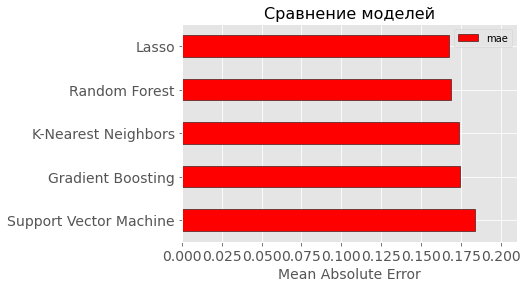

In [32]:
plt.figure(figsize = (8, 6))
plt.style.use('ggplot')

# Датафрейм для хранения результатов
model_comparison = pd.DataFrame({'model': ['Lasso', 'Random Forest',
                                            'Gradient Boosting', 'K-Nearest Neighbors',
                                            'Support Vector Machine'],
                                 'mae': [ls_mae, random_forest_mae, 
                                         gradient_boost_mae, knn_mae, svm_mae]})

# Горизонтальная гистограмма теста MAE
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error', fontsize = 14); plt.xticks(size = 14);
plt.xlim(0,0.21); plt.title('Сравнение моделей', size = 16);

### Градиентный бустинг

In [33]:
# Используемые для оптимизации гиперпараметры для градиентного бустинга
loss = ['ls', 'lad', 'huber'] # минимизация функции потерь

n_estimators = [100, 300, 500] # количество используемых деревьев решений (decision trees)

max_depth = [2, 3, 5, 10, 15] # максимальная глубина каждого дерева решений

min_samples_leaf = [1, 2, 4, 6, 8] # минимальное количество примеров, которые должны быть в «листовом» узле дерева решений 

min_samples_split = [2, 4, 6, 10] # минимальное количество примеров, которые нужны для разделения узла дерева решений

max_features = ['auto', 'sqrt', 'log2', None] # максимальное количество признаков, которые используются для разделения узлов

# Определение сетки гиперпараметров для поиска
hyperparameter_grid_gbr = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [34]:
# Создание модели для настройки гиперпараметров
model_gbr = GradientBoostingRegressor(random_state = 42)

# Настройка случайного поиска с 10-блочной перекрёстной проверкой
random_cv_gbr = RandomizedSearchCV(estimator=model_gbr,
                               param_distributions=hyperparameter_grid_gbr,
                               cv=10, n_iter=20, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [35]:
# Обучение модели на тестовом наборе данных
random_cv_gbr1 = random_cv_gbr.fit(x_train1, y_train1)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


In [36]:
# Вывод гиперпараметров для оптимальной модели
random_cv_gbr1.best_estimator_

GradientBoostingRegressor(loss='lad', max_depth=15, max_features='auto',
                          min_samples_split=10, random_state=42)

In [37]:
trees_grid_gbr = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500]}

model_GBR = GradientBoostingRegressor(loss = 'lad',
                                  max_depth = 15,
                                  #min_samples_leaf = 6,
                                  min_samples_split = 10,
                                  max_features = 'auto',
                                  random_state = 42)

# Поиск по сетке
grid_search_gbr = GridSearchCV(estimator = model_GBR, param_grid=trees_grid_gbr, cv = 10, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [38]:
grid_search_gbr1 = grid_search_gbr.fit(x_train1, y_train1);

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


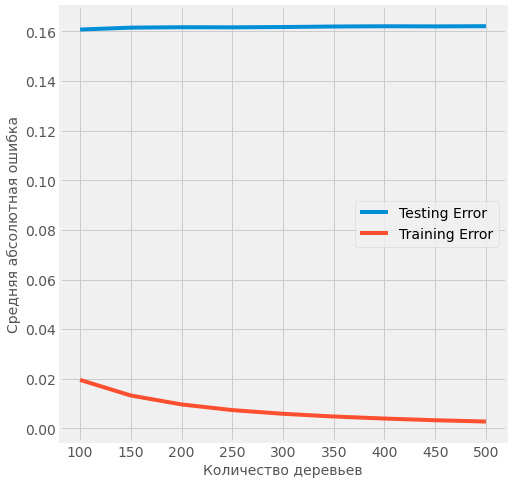

In [39]:
# Полученные результаты
results_gbr1 = pd.DataFrame(grid_search_gbr1.cv_results_)

# Построение графика ошибки обучения и тестирования в зависимости от количества деревьев
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
plt.plot(results_gbr1['param_n_estimators'], -1 * results_gbr1['mean_test_score'], label = 'Testing Error')
plt.plot(results_gbr1['param_n_estimators'], -1 * results_gbr1['mean_train_score'], label = 'Training Error')
plt.xlabel('Количество деревьев', fontsize =14); plt.ylabel('Средняя абсолютная ошибка', fontsize =14); plt.legend();

In [40]:
results_gbr1.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.213404      0.080019         0.004446        0.000509   
1       6.379581      0.078986         0.004711        0.000338   
3      10.575028      0.127822         0.005918        0.000447   
2       8.464530      0.109845         0.005855        0.001784   
4      12.689433      0.148140         0.006990        0.001993   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}          -0.171043   
1                150  {'n_estimators': 150}          -0.171285   
3                250  {'n_estimators': 250}          -0.171115   
2                200  {'n_estimators': 200}          -0.171018   
4                300  {'n_estimators': 300}          -0.170777   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0          -0.142249          -0.158573          -0.162702  ...   
1          -0.142966          -0.160317          -0.163337  ...   
3          -0.141738          -0.160785          -0.164285  ...   
2          -0.142900          -0.160529          -0.163523  ...   
4          -0.141350          -0.160883          -0.164572  ...   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.019079           -0.018869           -0.019537   
1           -0.013419           -0.012941           -0.013331   
3           -0.007480           -0.007298           -0.007703   
2           -0.009577           -0.009597           -0.009868   
4           -0.006268           -0.005844           -0.006229   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.019785           -0.020120           -0.020033   
1           -0.013550           -0.014157           -0.013035   
3           -0.007912           -0.007488           -0.007005   
2           -0.010110           -0.010107           -0.009319   
4           -0.006580           -0.005936           -0.005346   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.019321           -0.019524         -0.019526         0.000869  
1           -0.012862           -0.013134         -0.013222         0.000753  
3           -0.007139           -0.007246         -0.007346         0.000417  
2           -0.009456           -0.009590         -0.009634         0.000562  
4           -0.005497           -0.005894         -0.005861         0.000441  

[5 rows x 31 columns]

In [41]:
# Модель с параметрами по умолчанию
default_model_gbr1 = GradientBoostingRegressor(random_state = 42).fit(x_train1, y_train1)
default_model_gbr1

GradientBoostingRegressor(random_state=42)

In [42]:
# Настроенная наилучшая модель
final_model_gbr1 = grid_search_gbr1.best_estimator_
final_model_gbr1

GradientBoostingRegressor(loss='lad', max_depth=15, max_features='auto',
                          min_samples_split=10, random_state=42)

In [43]:
default_pred_gbr1 = default_model_gbr1.predict(x_test1)
final_pred_gbr1 = final_model_gbr1.predict(x_test1)

print('Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = %0.4f.' % mae(y_test1, default_pred_gbr1))
print('Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = %0.4f.' % mae(y_test1, final_pred_gbr1))

Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = 0.1747.
Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = 0.1728.


In [44]:
# Создание датасета с тестовыми и спрогнозированными данными
feature_res_gbr1 = pd.DataFrame({'Тестовые данные': y_test1, 'Спрогнозированные данные': final_pred_gbr1})
plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
plt.title('Градиентный бустинг для прогноза модуля упругости при растяжении', size=14)
sns.scatterplot(data=feature_res_gbr1, x = 'Тестовые данные', y = 'Спрогнозированные данные', edgecolor='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
feature_res_gbr1

Тестовые данные  Спрогнозированные данные
319         0.387108                  0.395278
377         0.742719                  0.487172
538         0.364855                  0.448914
296         0.435807                  0.456200
531         0.468100                  0.426032
..               ...                       ...
420         0.359362                  0.475689
133         0.446885                  0.369484
490         0.609638                  0.440140
558         0.372351                  0.439003
363         0.392277                  0.291119

[277 rows x 2 columns]

In [45]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
# График плотности прогнозных (синий цвет) и реальных значений (красный цвет)
sns.kdeplot(final_pred_gbr1, label = 'Predictions')
sns.kdeplot(y_test1, label = 'Values')
plt.xlim(0,1)

plt.subplot(1, 2, 2)
residuals1 = final_pred_gbr1 - y_test1
# Гистограмма погрешности
plt.hist(residuals1, color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')

Text(0, 0.5, 'Count')

### Случайный лес

In [46]:
# Используемые для оптимизации гиперпараметры для модели Случайный лес
n_estimators = [100, 200, 500] # количество используемых деревьев

criterion = ['mae', 'mse']

max_depth = [4, 5, 6, 7, 8, 10, 12] # максимальная глубина каждого дерева решений

min_samples_leaf = [1, 2, 4, 6, 8] # минимальное количество примеров, которые должны быть в «листовом» узле дерева решений 

min_samples_split = [2, 4, 6] # минимальное количество примеров, которые нужны для разделения узла дерева решений

max_features = ['auto', 'sqrt', 'log2', None] # максимальное количество признаков, которые используются для разделения узлов

# Определение сетки гиперпараметров для поиска
hyperparameter_grid_rfr = {'n_estimators': n_estimators,
                       'criterion': criterion,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [47]:
# Создание модели для настройки гиперпараметров
model_rfr = RandomForestRegressor()

# Настройка случайного поиска с 10-блочной перекрёстной проверкой
random_cv_rfr = RandomizedSearchCV(estimator=model_rfr,
                               param_distributions=hyperparameter_grid_rfr,
                               cv=10, n_iter=15, 
                               scoring = 'neg_mean_squared_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [48]:
# Обучение модели на тестовом наборе данных
random_cv_rfr1 = random_cv_rfr.fit(x_train1, y_train1)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


In [49]:
# Вывод гиперпараметров для оптимальной модели
random_cv_rfr1.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=4, max_features='log2',
                      min_samples_leaf=8, min_samples_split=4,
                      n_estimators=200)

In [50]:
trees_grid_rfr = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]}

model_RFR = RandomForestRegressor(criterion='mae',
                                  max_depth = 4,
                                  min_samples_leaf = 8,
                                  min_samples_split = 4,
                                  max_features = 'log2',
                                  random_state = 42)

# Поиск по сетке
grid_search_rfr = GridSearchCV(estimator = model_RFR, param_grid=trees_grid_rfr, cv = 10, 
                           scoring = 'neg_mean_squared_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [51]:
grid_search_rfr1 = grid_search_rfr.fit(x_train1, y_train1);

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


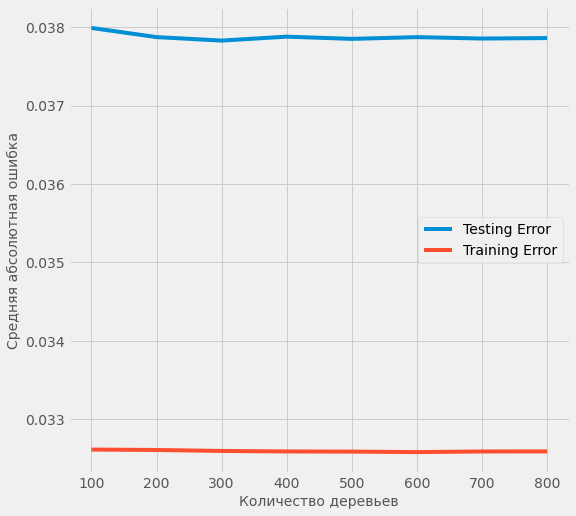

In [52]:
# Полученные результаты
results_rfr1 = pd.DataFrame(grid_search_rfr1.cv_results_)

# Построение графика ошибки обучения и тестирования в зависимости от количества деревьев
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
plt.plot(results_rfr1['param_n_estimators'], -1 * results_rfr1['mean_test_score'], label = 'Testing Error')
plt.plot(results_rfr1['param_n_estimators'], -1 * results_rfr1['mean_train_score'], label = 'Training Error')
plt.xlabel('Количество деревьев', fontsize =14); plt.ylabel('Средняя абсолютная ошибка', fontsize =14); plt.legend();

In [53]:
results_rfr1.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       2.704384      0.770610         0.051239        0.035098   
4       3.891128      0.037194         0.070363        0.007534   
6       5.441954      0.033605         0.092038        0.012547   
7       6.168203      0.083546         0.108149        0.029773   
5       4.667804      0.043508         0.083233        0.007211   

  param_n_estimators                 params  split0_test_score  \
2                300  {'n_estimators': 300}          -0.044703   
4                500  {'n_estimators': 500}          -0.044588   
6                700  {'n_estimators': 700}          -0.044523   
7                800  {'n_estimators': 800}          -0.044553   
5                600  {'n_estimators': 600}          -0.044520   

   split1_test_score  split2_test_score  split3_test_score  ...  \
2          -0.030577          -0.036391          -0.040525  ...   
4          -0.030725          -0.036669          -0.040409  ...   
6          -0.030773          -0.036702          -0.040496  ...   
7          -0.030723          -0.036707          -0.040483  ...   
5          -0.030725          -0.036690          -0.040467  ...   

   split2_train_score  split3_train_score  split4_train_score  \
2           -0.032566           -0.032300           -0.031191   
4           -0.032590           -0.032292           -0.031174   
6           -0.032592           -0.032307           -0.031177   
7           -0.032577           -0.032331           -0.031182   
5           -0.032554           -0.032289           -0.031186   

   split5_train_score  split6_train_score  split7_train_score  \
2           -0.033083           -0.032455           -0.032862   
4           -0.033072           -0.032423           -0.032853   
6           -0.033096           -0.032464           -0.032890   
7           -0.033055           -0.032467           -0.032912   
5           -0.033061           -0.032454           -0.032860   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
2           -0.032921           -0.033356         -0.032596         0.000674  
4           -0.032953           -0.033248         -0.032587         0.000663  
6           -0.032987           -0.033202         -0.032589         0.000663  
7           -0.032970           -0.033206         -0.032590         0.000662  
5           -0.032967           -0.033215         -0.032581         0.000656  

[5 rows x 31 columns]

In [54]:
# Модель с параметрами по умолчанию
default_model_rfr1 = RandomForestRegressor().fit(x_train1, y_train1)
default_model_rfr1

RandomForestRegressor()

In [55]:
# Настроенная наилучшая модель
final_model_rfr1 = grid_search_rfr1.best_estimator_
final_model_rfr1

RandomForestRegressor(criterion='mae', max_depth=4, max_features='log2',
                      min_samples_leaf=8, min_samples_split=4, n_estimators=300,
                      random_state=42)

In [56]:
default_pred_rfr1 = default_model_rfr1.predict(x_test1)
final_pred_rfr1 = final_model_rfr1.predict(x_test1)

print('Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = %0.4f.' % mae(y_test1, default_pred_rfr1))
print('Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = %0.4f.' % mae(y_test1, final_pred_rfr1))

Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = 0.1677.
Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = 0.1677.


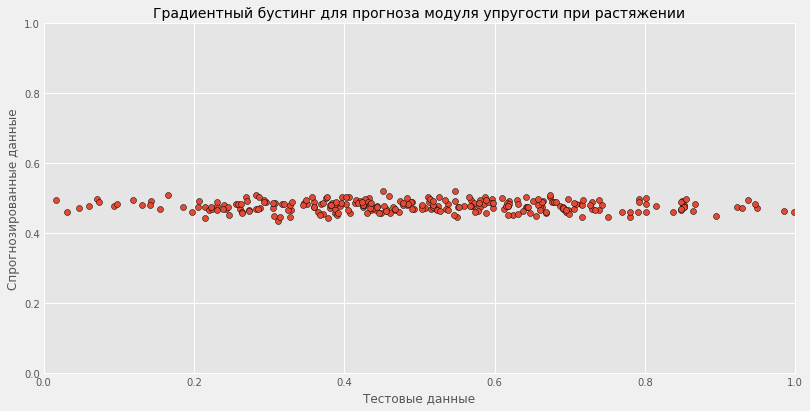

Тестовые данные  Спрогнозированные данные
319         0.387108                  0.459092
377         0.742719                  0.480743
538         0.364855                  0.461990
296         0.435807                  0.465367
531         0.468100                  0.467930
..               ...                       ...
420         0.359362                  0.473950
133         0.446885                  0.459269
490         0.609638                  0.501269
558         0.372351                  0.488084
363         0.392277                  0.459069

[277 rows x 2 columns]

In [57]:
# Создание датасета с тестовыми и спрогнозированными данными
feature_res_rfr1 = pd.DataFrame({'Тестовые данные': y_test1, 'Спрогнозированные данные': final_pred_rfr1})
plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
plt.title('Градиентный бустинг для прогноза модуля упругости при растяжении', size=14)
sns.scatterplot(data=feature_res_rfr1, x = 'Тестовые данные', y = 'Спрогнозированные данные', edgecolor='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
feature_res_rfr1

Text(0, 0.5, 'Count')

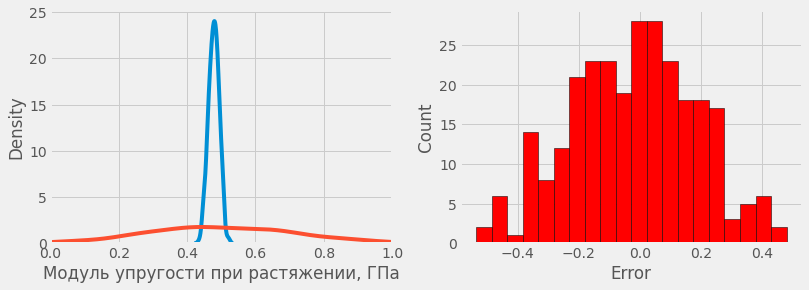

In [58]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
# График плотности прогнозных (синий цвет) и реальных значений (красный цвет)
sns.kdeplot(final_pred_rfr1, label = 'Predictions')
sns.kdeplot(y_test1, label = 'Values')
plt.xlim(0,1)

plt.subplot(1, 2, 2)
residuals1 = final_pred_rfr1 - y_test1
# Гистограмма погрешности
plt.hist(residuals1, color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')

### Линейная модель Лассо

In [59]:
# Нахождение гиперпараметров для модели Лассо для прогноза прочности при растяжении
alpha = [0.002, 0.003, 0.004, 0.005, 0.01, 0.5, 0.7, 0.9, 1]
hyperparameter_grid_ls = {'alpha': alpha}

model_ls = Lasso()

grid_search_ls = GridSearchCV(estimator = model_ls, param_grid=hyperparameter_grid_ls , scoring='neg_mean_absolute_error', cv=10, verbose=1)
grid_search_ls1 = grid_search_ls.fit(x_train1, y_train1)
grid_search_ls1.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


Lasso(alpha=0.004)

In [60]:
# Подставляем оптимальные гиперпараметры в модель
model_LS = Lasso(alpha=0.004)
# Обучаем модель
model_LS.fit(x_train1, y_train1)

Lasso(alpha=0.004)

In [61]:
# Модель с параметрами по умолчанию
default_model_ls1 = Lasso().fit(x_train1, y_train1)
default_model_ls1

Lasso()

In [62]:
# Настроенная наилучшая модель
final_model_ls1 = grid_search_ls1.best_estimator_
final_model_ls1

Lasso(alpha=0.004)

In [63]:
default_pred_ls1 = default_model_ls1.predict(x_test1)
final_pred_ls1 = final_model_ls1.predict(x_test1)

print('Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = %0.4f.' % mae(y_test1, default_pred_ls1))
print('Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = %0.4f.' % mae(y_test1, final_pred_ls1))

Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = 0.1674.
Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = 0.1678.


In [64]:
# Создание датасета с тестовыми и спрогнозированными данными
feature_res_ls1 = pd.DataFrame({'Тестовые данные': y_test1, 'Спрогнозированные данные': final_pred_ls1})
plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
plt.title('Модель Лассо для прогноза модуля упругости при растяжении', size=14)
sns.scatterplot(data=feature_res_ls1, x = 'Тестовые данные', y = 'Спрогнозированные данные', edgecolor='black')
plt.show()
feature_res_ls1

Тестовые данные  Спрогнозированные данные
319         0.387108                  0.477110
377         0.742719                  0.477110
538         0.364855                  0.485502
296         0.435807                  0.477110
531         0.468100                  0.485502
..               ...                       ...
420         0.359362                  0.477110
133         0.446885                  0.477110
490         0.609638                  0.485502
558         0.372351                  0.485502
363         0.392277                  0.477110

[277 rows x 2 columns]

In [65]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6, 4))

residuals1 = final_pred_ls1 - y_test1
# Гистограмма погрешности
plt.hist(residuals1, color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')

Text(0, 0.5, 'Count')

### Сравнение моделей

In [66]:
# Сравнение моделей с подобранными параметрами
models = [Lasso(alpha=0.004),
          GradientBoostingRegressor(loss='lad', max_depth=15, max_features='auto',
                          min_samples_split=10, random_state=42),
          RandomForestRegressor(criterion='mae', max_depth=12, max_features='sqrt',
                      min_samples_split=4, n_estimators=500) 
          ] 

print('Средняя абсолютная ошибка настроенной модели Lasso на тестовом наборе: MAE = %0.4f.' % mae(y_test1, final_pred_ls1))
print('Средняя абсолютная ошибка настроенной модели GradientBoostingRegressor на тестовом наборе: MAE = %0.4f.' % mae(y_test1, final_pred_gbr1))
print('Средняя абсолютная ошибка настроенной модели RandomForestRegressor на тестовом наборе: MAE = %0.4f.' % mae(y_test1, final_pred_rfr1))

Средняя абсолютная ошибка настроенной модели Lasso на тестовом наборе: MAE = 0.1678.
Средняя абсолютная ошибка настроенной модели GradientBoostingRegressor на тестовом наборе: MAE = 0.1728.
Средняя абсолютная ошибка настроенной модели RandomForestRegressor на тестовом наборе: MAE = 0.1677.


## Прогноз прочности при растяжении

In [67]:
# Функция обучения и оценки модели на тестовом наборе
def fit_and_evaluate(model):
    model.fit(x_train2, y_train2) # обучение модели 
    model_pred = model.predict(x_test2) # прогноз
    model_mae = mae(y_test2, model_pred) # оценка точности прогноза
    return model_mae

Список моделей:

Lasso() - линейная модель, прошедшая обучение с L1 в качестве регулятора (он же Лассо);

RandomForestRegressor() - случайный лес;

GradientBoostingRegressor() - метод градиентного бустинга;

KNeighborsRegressor() - метод k-ближайших соседей;

SVR() - метод опорных векторов

In [68]:
ls = Lasso()
ls_mae = fit_and_evaluate(ls)
print('Средняя абсолютная ошибка модели Lasso на тестовом наборе: MAE = %0.4f' % ls_mae)

random_forest = RandomForestRegressor(random_state=42)
random_forest_mae = fit_and_evaluate(random_forest)
print('Средняя абсолютная ошибка модели Random Forest Regression на тестовом наборе: MAE = %0.4f' % random_forest_mae)

gradient_boost = GradientBoostingRegressor(random_state=42)
gradient_boost_mae = fit_and_evaluate(gradient_boost)
print('Средняя абсолютная ошибка модели Gradient Boosting Regression на тестовом наборе: MAE = %0.4f' % gradient_boost_mae)

knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)
print('Средняя абсолютная ошибка модели K-Nearest Neighbors Regression на тестовом наборе данных: MAE = %0.4f' % knn_mae)

svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)
print('Средняя абсолютная ошибка модели Support Vector Machine Regression на тестовом наборе: MAE = %0.4f' % svm_mae)

Средняя абсолютная ошибка модели Lasso на тестовом наборе: MAE = 0.1534
Средняя абсолютная ошибка модели Random Forest Regression на тестовом наборе: MAE = 0.1574
Средняя абсолютная ошибка модели Gradient Boosting Regression на тестовом наборе: MAE = 0.1590
Средняя абсолютная ошибка модели K-Nearest Neighbors Regression на тестовом наборе данных: MAE = 0.1575
Средняя абсолютная ошибка модели Support Vector Machine Regression на тестовом наборе: MAE = 0.1749


<Figure size 576x432 with 0 Axes>

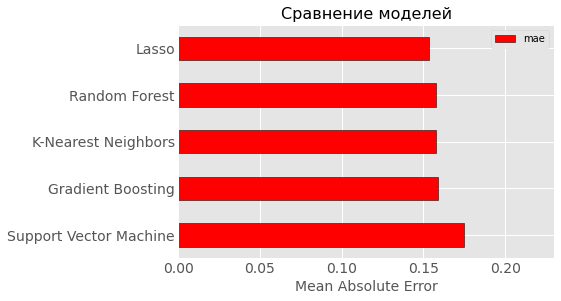

In [69]:
plt.figure(figsize = (8, 6))
plt.style.use('ggplot')

# Датафрейм для хранения результатов
model_comparison = pd.DataFrame({'model': ['Lasso', 'Random Forest',
                                            'Gradient Boosting', 'K-Nearest Neighbors',
                                            'Support Vector Machine'],
                                 'mae': [ls_mae, random_forest_mae, 
                                         gradient_boost_mae, knn_mae, svm_mae]})

# Горизонтальная гистограмма теста MAE
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error', fontsize = 14); plt.xticks(size = 14);
plt.xlim(0,0.23); plt.title('Сравнение моделей', size = 16);

### Линейная модель Лассо

In [70]:
# Нахождение гиперпараметров для модели Лассо для прогноза прочности при растяжении
alpha = [0.001, 0.004, 0.0045, 0.005, 0.01, 1]
hyperparameter_grid_ls = {'alpha': alpha}

model_ls = Lasso()

grid_search_ls = GridSearchCV(estimator = model_ls, param_grid=hyperparameter_grid_ls , scoring='neg_mean_absolute_error', cv=10, verbose=1)
grid_search_ls2 = grid_search_ls.fit(x_train2, y_train2)
grid_search_ls2.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


Lasso(alpha=0.004)

In [71]:
# Подставляем оптимальные гиперпараметры в модель
model_LS = Lasso(alpha = 0.004)
# Обучаем модель
model_LS.fit(x_train2, y_train2)

Lasso(alpha=0.004)

In [72]:
# Модель с параметрами по умолчанию
default_model_ls2 = Lasso().fit(x_train2, y_train2)
default_model_ls2

Lasso()

In [73]:
# Настроенная наилучшая модель
final_model_ls2 = grid_search_ls2.best_estimator_
final_model_ls2

Lasso(alpha=0.004)

In [74]:
default_pred_ls2 = default_model_ls2.predict(x_test2)
final_pred_ls2 = final_model_ls2.predict(x_test2)

print('Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = %0.4f.' % mae(y_test2, default_pred_ls2))
print('Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = %0.4f.' % mae(y_test2, final_pred_ls2))

Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = 0.1534.
Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = 0.1534.


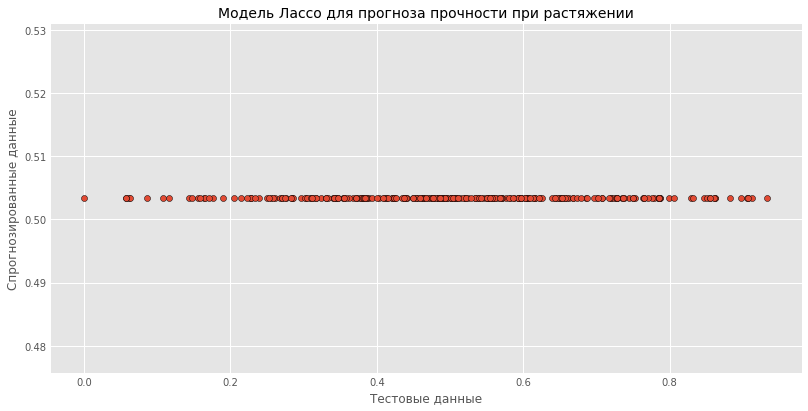

Тестовые данные  Спрогнозированные данные
319         0.381499                  0.503339
377         0.605408                  0.503339
538         0.708160                  0.503339
296         0.438781                  0.503339
531         0.061865                  0.503339
..               ...                       ...
420         0.854766                  0.503339
133         0.347529                  0.503339
490         0.503825                  0.503339
558         0.568094                  0.503339
363         0.510845                  0.503339

[277 rows x 2 columns]

In [75]:
# Создание датасета с тестовыми и спрогнозированными данными
feature_res_ls2 = pd.DataFrame({'Тестовые данные': y_test2, 'Спрогнозированные данные': final_pred_ls2})
plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
plt.title('Модель Лассо для прогноза прочности при растяжении', size=14)
sns.scatterplot(data=feature_res_ls2, x = 'Тестовые данные', y = 'Спрогнозированные данные', edgecolor='black')
plt.show()
feature_res_ls2

Text(0, 0.5, 'Count')

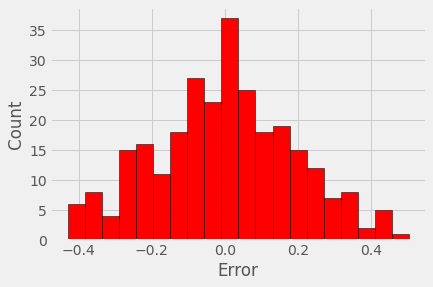

In [76]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6, 4))

residuals2 = final_pred_ls2 - y_test2
# Гистограмма погрешности
plt.hist(residuals2, color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')

### Модель k-ближайших соседей

In [77]:
# Нахождение гиперпараметров для модели k-ближайших соседей для прогноза прочности при растяжении
n_neighbors = [5, 10, 20, 30, 40, 50, 60, 70, 80]

weights = ['uniform', 'distance']

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

hyperparameter_grid_knr = {'n_neighbors': n_neighbors,
                          'weights': weights,
                          'algorithm': algorithm}

model_knr = KNeighborsRegressor()

grid_search_knr= GridSearchCV(estimator = model_knr, param_grid=hyperparameter_grid_knr, scoring='neg_mean_absolute_error', cv=10, verbose=1)
grid_search_knr2 = grid_search_knr.fit(x_train2, y_train2)
grid_search_knr2.best_estimator_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


KNeighborsRegressor(n_neighbors=70, weights='distance')

In [78]:
# Подставляем оптимальные гиперпараметры в модель
model_KNR = KNeighborsRegressor(n_neighbors=70, weights='distance')
# Обучаем модель
model_KNR.fit(x_train2, y_train2)

KNeighborsRegressor(n_neighbors=70, weights='distance')

In [79]:
# Модель с параметрами по умолчанию
default_model_knr2 = KNeighborsRegressor().fit(x_train2, y_train2)
default_model_knr2

KNeighborsRegressor()

In [80]:
# Настроенная наилучшая модель
final_model_knr2 = grid_search_knr2.best_estimator_
final_model_knr2

KNeighborsRegressor(n_neighbors=70, weights='distance')

In [81]:
default_pred_knr2 = default_model_knr2.predict(x_test2)
final_pred_knr2 = final_model_knr2.predict(x_test2)

print('Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = %0.4f.' % mae(y_test2, default_pred_knr2))
print('Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = %0.4f.' % mae(y_test2, final_pred_knr2))

Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = 0.1666.
Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = 0.1541.


In [82]:
# Создание датасета с тестовыми и спрогнозированными данными
feature_res_knr2 = pd.DataFrame({'Тестовые данные': y_test2, 'Спрогнозированные данные': final_pred_knr2})
plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
plt.title('Модель k-ближайших соседей для прогноза прочности при растяжении', size=14)
sns.scatterplot(data=feature_res_knr2, x = 'Тестовые данные', y = 'Спрогнозированные данные', edgecolor='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
feature_res_knr2

Тестовые данные  Спрогнозированные данные
319         0.381499                  0.497051
377         0.605408                  0.495601
538         0.708160                  0.492720
296         0.438781                  0.443859
531         0.061865                  0.472416
..               ...                       ...
420         0.854766                  0.516820
133         0.347529                  0.509669
490         0.503825                  0.515138
558         0.568094                  0.540368
363         0.510845                  0.524114

[277 rows x 2 columns]

Text(0, 0.5, 'Count')

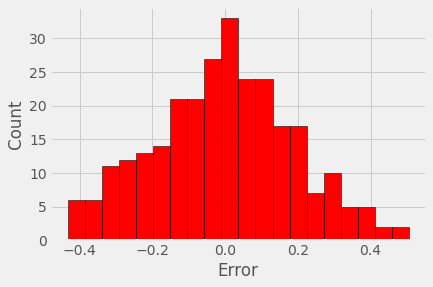

In [83]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6, 4))

residuals2 = final_pred_knr2 - y_test2
# Гистограмма погрешности
plt.hist(residuals2, color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')

### Метод опорных векторов

In [84]:
# Нахождение гиперпараметров для метода опорных векторов для прогноза прочности при растяжении
kernel = ['linear', 'poly', 'rbf']

degree = [3, 5, 7,]

C = [0.00001, 0.0001, 0.001]

gamma = [0.1, 0.3, 0.5, 0.7, 0.9, 1]

hyperparameter_grid_svr = {'kernel': kernel,
                           'degree': degree,
                           'C': C,
                           'gamma': gamma}

model_svr = SVR()

grid_search_svr= GridSearchCV(estimator = model_svr, param_grid=hyperparameter_grid_svr, scoring='neg_mean_absolute_error', cv=10, verbose=1)
grid_search_svr2 = grid_search_svr.fit(x_train2, y_train2)
grid_search_svr2.best_estimator_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


SVR(C=0.0001, degree=5, gamma=0.9, kernel='poly')

In [85]:
# Подставляем оптимальные гиперпараметры в модель
model_SVR = SVR(C=0.0001, degree=5, gamma=0.9, kernel='poly')
# Обучаем модель
model_SVR.fit(x_train2, y_train2)

SVR(C=0.0001, degree=5, gamma=0.9, kernel='poly')

In [86]:
# Модель с параметрами по умолчанию
default_model_svr2 = SVR().fit(x_train2, y_train2)
default_model_svr2

SVR()

In [87]:
# Настроенная наилучшая модель
final_model_svr2 = grid_search_svr2.best_estimator_
final_model_svr2

SVR(C=0.0001, degree=5, gamma=0.9, kernel='poly')

In [88]:
default_pred_svr2 = default_model_svr2.predict(x_test2)
final_pred_svr2 = final_model_svr2.predict(x_test2)

print('Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = %0.4f.' % mae(y_test2, default_pred_svr2))
print('Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = %0.4f.' % mae(y_test2, final_pred_svr2))

Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = 0.1663.
Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = 0.1541.


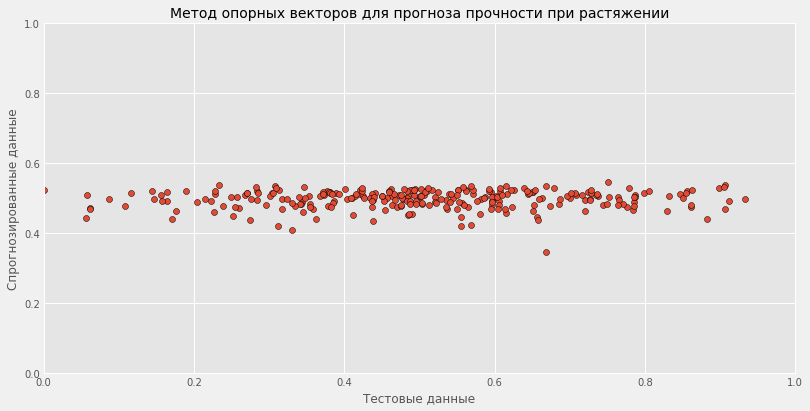

Тестовые данные  Спрогнозированные данные
319         0.381499                  0.518916
377         0.605408                  0.493429
538         0.708160                  0.509172
296         0.438781                  0.436584
531         0.061865                  0.471816
..               ...                       ...
420         0.854766                  0.515011
133         0.347529                  0.499941
490         0.503825                  0.486532
558         0.568094                  0.534347
363         0.510845                  0.528162

[277 rows x 2 columns]

In [89]:
# Создание датасета с тестовыми и спрогнозированными данными
feature_res_svr2 = pd.DataFrame({'Тестовые данные': y_test2, 'Спрогнозированные данные': final_pred_svr2})
plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
plt.title('Метод опорных векторов для прогноза прочности при растяжении', size=14)
sns.scatterplot(data=feature_res_svr2, x = 'Тестовые данные', y = 'Спрогнозированные данные', edgecolor='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
feature_res_svr2

Text(0, 0.5, 'Count')

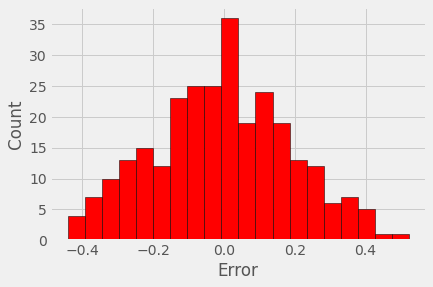

In [90]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6, 4))

residuals2 = final_pred_svr2 - y_test2
# Гистограмма погрешности
plt.hist(residuals2, color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')

### Градиентный бустинг

In [187]:
# Используемые для оптимизации гиперпараметры для градиентного бустинга
loss = ['ls', 'lad', 'huber'] # минимизация функции потерь

n_estimators = [100, 300, 500] # количество используемых деревьев решений (decision trees)

max_depth = [2, 3, 5, 10, 15] # максимальная глубина каждого дерева решений

min_samples_leaf = [1, 2, 4, 6, 8] # минимальное количество примеров, которые должны быть в «листовом» узле дерева решений 

min_samples_split = [2, 4, 6, 10] # минимальное количество примеров, которые нужны для разделения узла дерева решений

max_features = ['auto', 'sqrt', 'log2', None] # максимальное количество признаков, которые используются для разделения узлов

# Определение сетки гиперпараметров для поиска
hyperparameter_grid_gbr = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [188]:
# Создание модели для настройки гиперпараметров
model_gbr = GradientBoostingRegressor(random_state = 42)

# Настройка случайного поиска с 10-блочной перекрёстной проверкой
random_cv_gbr = RandomizedSearchCV(estimator=model_gbr,
                               param_distributions=hyperparameter_grid_gbr,
                               cv=10, n_iter=20, 
                               scoring = 'neg_mean_squared_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [189]:
# Обучение модели на тестовом наборе данных
random_cv_gbr2 = random_cv_gbr.fit(x_train2, y_train2)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


In [190]:
# Вывод гиперпараметров для оптимальной модели
random_cv_gbr2.best_estimator_

GradientBoostingRegressor(loss='lad', max_depth=2, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=10,
                          n_estimators=300, random_state=42)

In [191]:
trees_grid_gbr = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500]}

model_GBR = GradientBoostingRegressor(loss = 'lad',
                                  max_depth = 2,
                                  min_samples_leaf = 4,
                                  min_samples_split = 10,
                                  max_features = 'sqrt',
                                  random_state = 42)

# Поиск по сетке
grid_search_gbr = GridSearchCV(estimator = model_GBR, param_grid=trees_grid_gbr, cv = 10, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [192]:
grid_search_gbr2 = grid_search_gbr.fit(x_train2, y_train2);

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


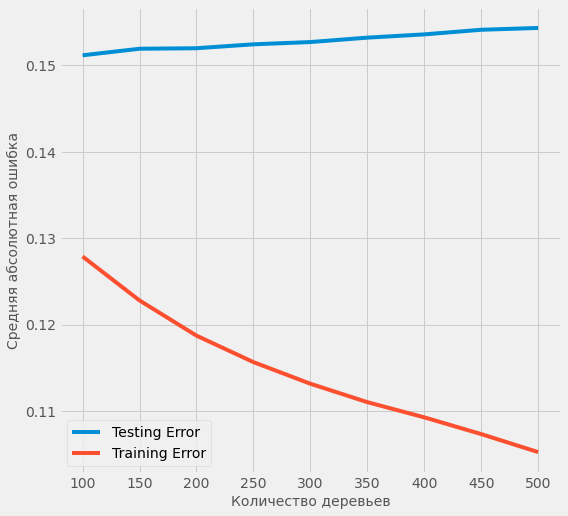

In [193]:
# Полученные результаты
results_gbr2 = pd.DataFrame(grid_search_gbr2.cv_results_)

# Построение графика ошибки обучения и тестирования в зависимости от количества деревьев
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
plt.plot(results_gbr2['param_n_estimators'], -1 * results_gbr2['mean_test_score'], label = 'Testing Error')
plt.plot(results_gbr2['param_n_estimators'], -1 * results_gbr2['mean_train_score'], label = 'Training Error')
plt.xlabel('Количество деревьев', fontsize =14); plt.ylabel('Средняя абсолютная ошибка', fontsize =14); plt.legend();

In [194]:
results_gbr2.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.272340      0.006142         0.003813        0.001660   
1       0.409816      0.006637         0.003827        0.000870   
2       0.544873      0.016491         0.003901        0.000526   
3       0.667804      0.014536         0.003884        0.000132   
4       0.795567      0.011974         0.003905        0.000077   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}          -0.158020   
1                150  {'n_estimators': 150}          -0.158031   
2                200  {'n_estimators': 200}          -0.157032   
3                250  {'n_estimators': 250}          -0.158061   
4                300  {'n_estimators': 300}          -0.158477   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0          -0.159939          -0.154874          -0.138795  ...   
1          -0.161523          -0.153668          -0.137411  ...   
2          -0.162424          -0.153409          -0.137454  ...   
3          -0.161616          -0.154173          -0.137893  ...   
4          -0.161702          -0.154544          -0.136971  ...   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.127655           -0.128789           -0.128100   
1           -0.122600           -0.124148           -0.122781   
2           -0.118801           -0.119972           -0.118781   
3           -0.116146           -0.116088           -0.115774   
4           -0.114182           -0.113671           -0.112719   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.128610           -0.129839           -0.127782   
1           -0.124584           -0.123757           -0.122145   
2           -0.121227           -0.119444           -0.118478   
3           -0.118494           -0.117284           -0.114758   
4           -0.116024           -0.114379           -0.112519   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.125778           -0.127339         -0.127875         0.001022  
1           -0.120466           -0.122228         -0.122787         0.001146  
2           -0.116043           -0.117670         -0.118714         0.001337  
3           -0.113625           -0.114284         -0.115649         0.001391  
4           -0.111253           -0.112017         -0.113147         0.001375  

[5 rows x 31 columns]

In [195]:
# Модель с параметрами по умолчанию
default_model_gbr2 = GradientBoostingRegressor(random_state = 42).fit(x_train2, y_train2)
default_model_gbr2

GradientBoostingRegressor(random_state=42)

In [196]:
# Настроенная наилучшая модель
final_model_gbr2 = grid_search_gbr2.best_estimator_
final_model_gbr2

GradientBoostingRegressor(loss='lad', max_depth=2, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=10,
                          random_state=42)

In [197]:
default_pred_gbr2 = default_model_gbr2.predict(x_test2)
final_pred_gbr2 = final_model_gbr2.predict(x_test2)

print('Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = %0.4f.' % mae(y_test2, default_pred_gbr2))
print('Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = %0.4f.' % mae(y_test2, final_pred_gbr2))

Средняя абсолютная ошибка модели со стандартными параметрами на тестовом наборе: MAE = 0.1590.
Средняя абсолютная ошибка настроенной модели на тестовом наборе: MAE = 0.1559.


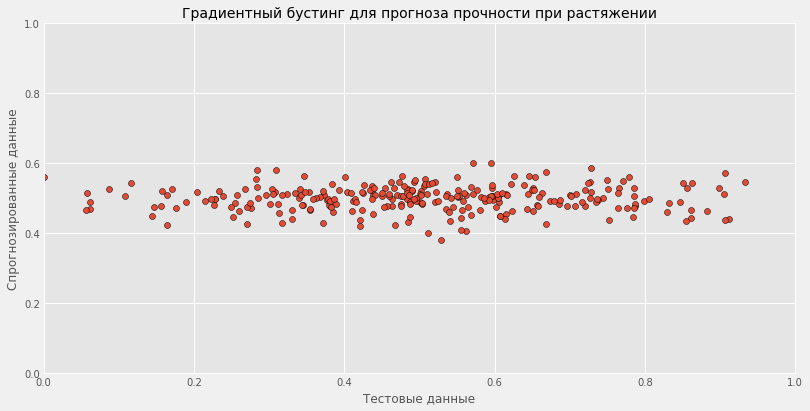

Тестовые данные  Спрогнозированные данные
319         0.381499                  0.477776
377         0.605408                  0.508165
538         0.708160                  0.511722
296         0.438781                  0.510172
531         0.061865                  0.490830
..               ...                       ...
420         0.854766                  0.434579
133         0.347529                  0.516971
490         0.503825                  0.486106
558         0.568094                  0.532512
363         0.510845                  0.402278

[277 rows x 2 columns]

In [198]:
# Создание датасета с тестовыми и спрогнозированными данными
feature_res_gbr2 = pd.DataFrame({'Тестовые данные': y_test2, 'Спрогнозированные данные': final_pred_gbr2})
plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
plt.title('Градиентный бустинг для прогноза прочности при растяжении', size=14)
sns.scatterplot(data=feature_res_gbr2, x = 'Тестовые данные', y = 'Спрогнозированные данные', edgecolor='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
feature_res_gbr2

Text(0, 0.5, 'Count')

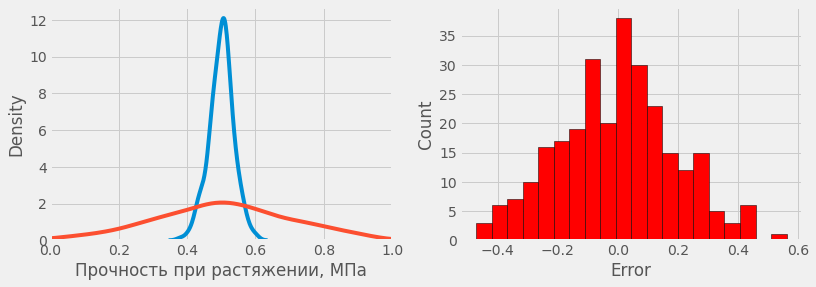

In [199]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
# График плотности прогнозных (синий цвет) и реальных значений (красный цвет)
sns.kdeplot(final_pred_gbr2, label = 'Predictions')
sns.kdeplot(y_test2, label = 'Values')
plt.xlim(0,1)

plt.subplot(1, 2, 2)
residuals2 = final_pred_gbr2 - y_test2
# Гистограмма погрешности
plt.hist(residuals2, color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')

### Сравнение моделей

In [201]:
# Сравнение моделей с подобранными параметрами
models = [Lasso(alpha=0.004),
          KNeighborsRegressor(n_neighbors=70, weights='distance'),
          SVR(C=0.0001, degree=5, gamma=0.9, kernel='poly'),
          GradientBoostingRegressor(loss='lad', max_depth=2, max_features='sqrt',
                                    min_samples_leaf=4, min_samples_split=10,
                                    random_state=42)
          ] 

print('Средняя абсолютная ошибка настроенной модели Lasso на тестовом наборе: MAE = %0.4f.' % mae(y_test2, final_pred_ls2))
print('Средняя абсолютная ошибка настроенной модели KNeighborsRegressor на тестовом наборе: MAE = %0.4f.' % mae(y_test2, final_pred_knr2))
print('Средняя абсолютная ошибка настроенной модели SVR на тестовом наборе: MAE = %0.4f.' % mae(y_test2, final_pred_svr2))
print('Средняя абсолютная ошибка настроенной модели GradientBoostingRegressor на тестовом наборе: MAE = %0.4f.' % mae(y_test2, final_pred_gbr2))

Средняя абсолютная ошибка настроенной модели Lasso на тестовом наборе: MAE = 0.1534.
Средняя абсолютная ошибка настроенной модели KNeighborsRegressor на тестовом наборе: MAE = 0.1541.
Средняя абсолютная ошибка настроенной модели SVR на тестовом наборе: MAE = 0.1541.
Средняя абсолютная ошибка настроенной модели GradientBoostingRegressor на тестовом наборе: MAE = 0.1559.


# Построение и обучение моделей для прогноза соотношения матрица-наполнитель

In [202]:
X= data_prep.copy()
X

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [203]:
y = X.pop('Соотношение матрица-наполнитель')
y

1       1.857143
3       1.857143
4       2.771331
5       2.767918
6       2.569620
          ...   
1018    2.271346
1019    3.444022
1020    3.280604
1021    3.705351
1022    3.808020
Name: Соотношение матрица-наполнитель, Length: 922, dtype: float64

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [205]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[1974.1189    736.11993   111.13606    22.200567  286.18106   482.42905
    73.30347  2461.4912    218.04807    45.97614     6.931939   57.562885]]


In [206]:
def plot_loss(history):
    plt.figure(figsize = (8, 4))
    plt.style.use('ggplot')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.ylim(0,2)
    plt.legend()
    plt.grid(True)

## Линейная модель

In [207]:
linear_model = tf.keras.Sequential([
    normalizer,
    keras.layers.Dense(units=1)
])

In [208]:
lm_pred = linear_model.predict(X_train)

In [209]:
y_train

552    1.816392
735    1.397467
554    1.966911
403    3.360842
948    1.779382
         ...   
120    4.379430
306    3.299961
959    2.263186
497    3.016343
113    3.108043
Name: Соотношение матрица-наполнитель, Length: 645, dtype: float64

In [210]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

CPU times: user 14.8 s, sys: 773 ms, total: 15.5 s
Wall time: 16.3 s


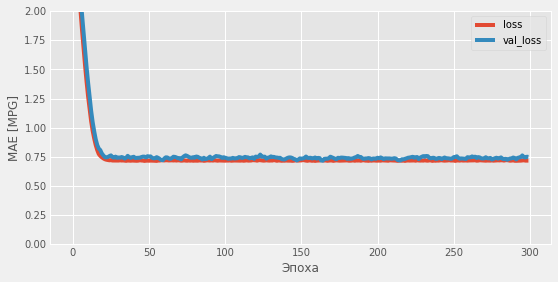

In [211]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=300,
    verbose=0,
    validation_split = 0.2)

plot_loss(history)

In [212]:
linear_model.evaluate(X_test, y_test, verbose=0)

0.7294415831565857

In [213]:
linear_model.evaluate(X_train, y_train, verbose=0)

0.721021294593811

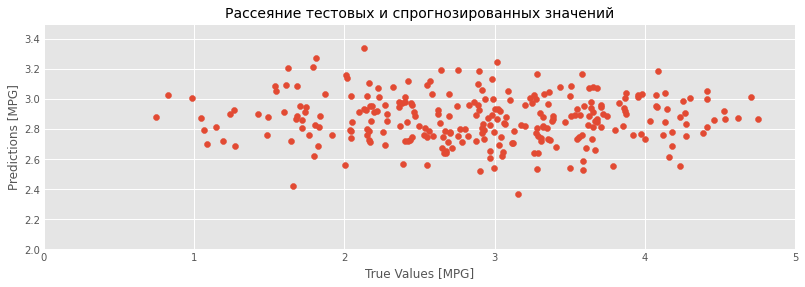

Тест   Прогноз
360  2.097010  2.911542
427  4.073344  2.952605
611  1.647649  2.720194
336  3.391009  2.889096
604  3.578784  3.164991
..        ...       ...
479  2.424798  2.719007
149  1.916843  2.760573
561  3.011978  3.248160
632  2.622594  2.901837
411  1.273273  2.689256

[277 rows x 2 columns]

In [214]:
test_predictions_lm = linear_model.predict(X_test).flatten()
feature_res_lm = pd.DataFrame({'Тест': y_test, 'Прогноз': test_predictions_lm})

plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions_lm)
plt.title('Рассеяние тестовых и спрогнозированных значений', size=14)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.xlim(0,5)
plt.ylim(2,3.5)
plt.show()

feature_res_lm

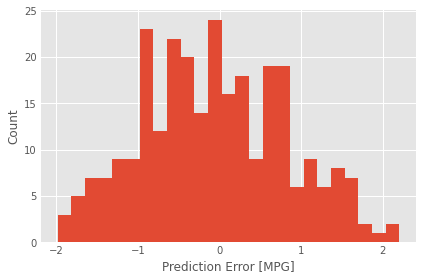

In [215]:
error_lm = test_predictions_lm - y_test
plt.hist(error_lm, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

## Многослойный персептрон

In [216]:
def build_and_compile_model0(norm):
    model0 = keras.Sequential([
      norm,
      keras.layers.Dense(128, activation='sigmoid'),
      keras.layers.Dense(64, activation='sigmoid'),
      keras.layers.Dense(1)
    ])

    model0.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001))
    return model0

dnn_model0 = build_and_compile_model0(normalizer)
dnn_model0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 128)               1664      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,010
Trainable params: 9,985
Non-trainable params: 25
_________________________________________________________________


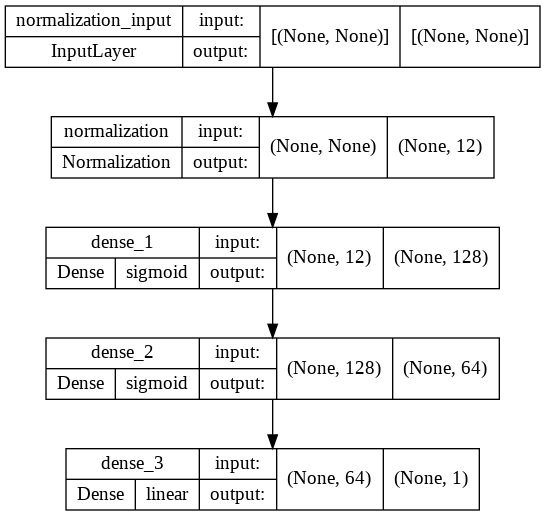

In [217]:
# Архитектура нейронной сети
keras.utils.plot_model(dnn_model0, show_shapes=True, show_layer_names=True, show_layer_activations=True)

CPU times: user 16.5 s, sys: 881 ms, total: 17.4 s
Wall time: 21.1 s


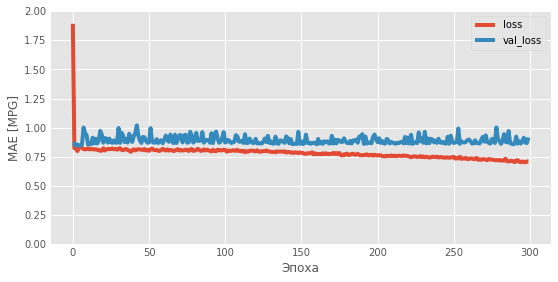

In [218]:
%%time
history0 = dnn_model0.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    verbose=0, epochs=300)
plot_loss(history0)

In [219]:
dnn_model0.evaluate(X_test, y_test, verbose=0)

0.8168711066246033

In [220]:
dnn_model0.evaluate(X_train, y_train, verbose=0)

0.7496809363365173

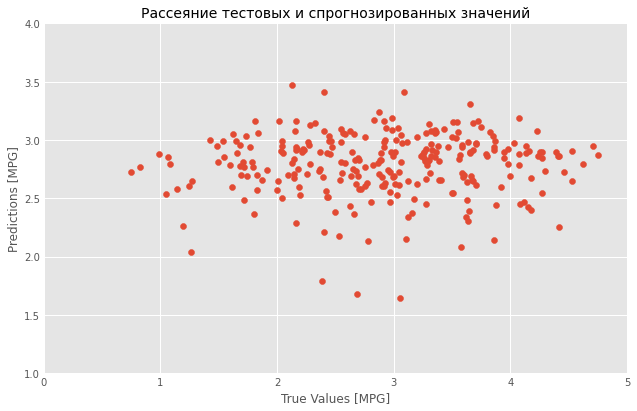

Тест   Прогноз
360  2.097010  2.698929
427  4.073344  2.787695
611  1.647649  2.989741
336  3.391009  2.654714
604  3.578784  2.083353
..        ...       ...
479  2.424798  2.508657
149  1.916843  2.745739
561  3.011978  2.896571
632  2.622594  2.435316
411  1.273273  2.652678

[277 rows x 2 columns]

In [221]:
test_predictions0 = dnn_model0.predict(X_test).flatten()
feature_res_0 = pd.DataFrame({'Тест': y_test, 'Прогноз': test_predictions0})

plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions0)
plt.title('Рассеяние тестовых и спрогнозированных значений', size=14)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.xlim(0,5)
plt.ylim(1,4)
plt.show()

feature_res_0

In [222]:
error0 = test_predictions0 - y_test
plt.hist(error0, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [223]:
def build_and_compile_model1(norm):
    model1 = keras.Sequential([
      norm,
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dropout(0.8),
      keras.layers.Dense(192, activation='relu'),
      keras.layers.Dropout(0.8),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dropout(0.8),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dropout(0.8),
      keras.layers.Dense(1)
    ])

    model1.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    return model1

dnn_model1 = build_and_compile_model1(normalizer)
dnn_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 256)               3328      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 192)               49344     
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               24704     
                                                      

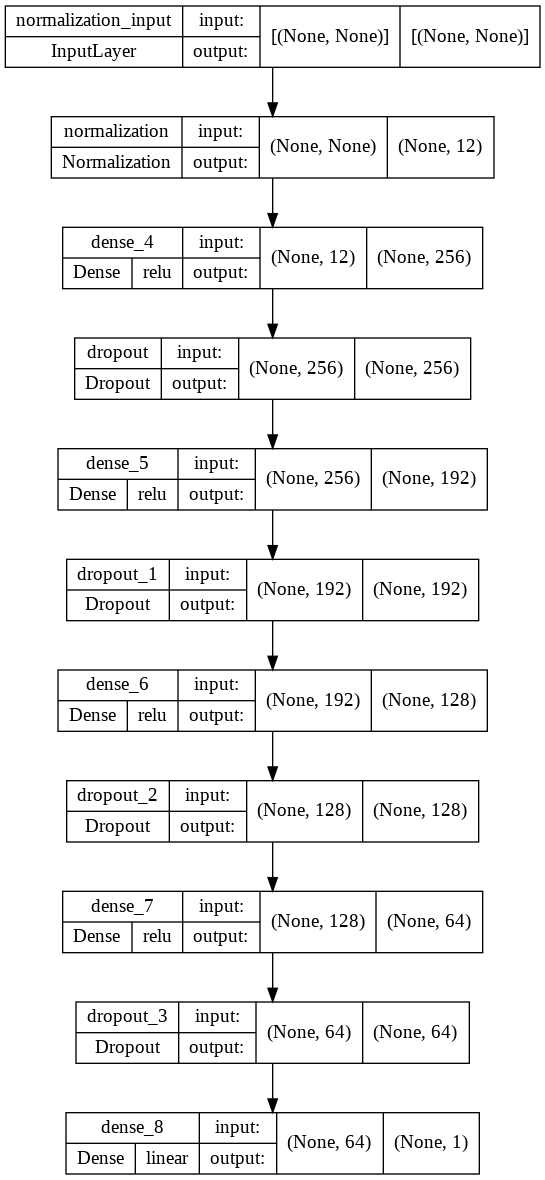

In [224]:
# Архитектура нейронной сети
keras.utils.plot_model(dnn_model1, show_shapes=True, show_layer_names=True, show_layer_activations=True)

CPU times: user 26.1 s, sys: 1.45 s, total: 27.5 s
Wall time: 41.6 s


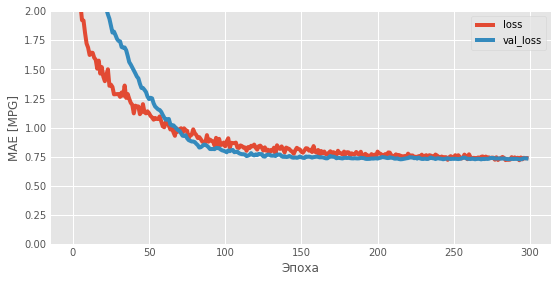

In [225]:
%%time
history1 = dnn_model1.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    verbose=0, epochs=300)
plot_loss(history1)

In [226]:
dnn_model1.evaluate(X_test, y_test, verbose=0)

0.7274526953697205

In [227]:
dnn_model1.evaluate(X_train, y_train, verbose=0)

0.7267543077468872

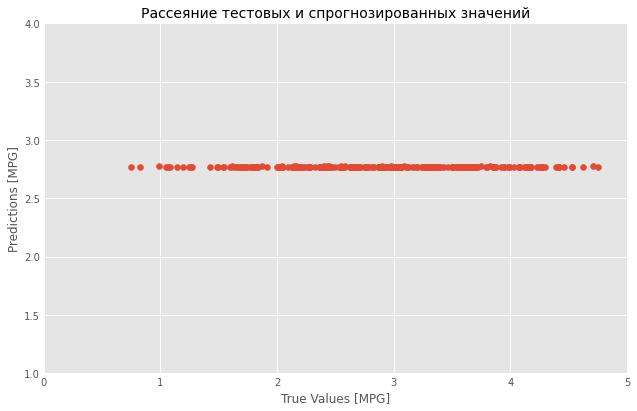

Тест   Прогноз
360  2.097010  2.771945
427  4.073344  2.771527
611  1.647649  2.772239
336  3.391009  2.771825
604  3.578784  2.772597
..        ...       ...
479  2.424798  2.771859
149  1.916843  2.772062
561  3.011978  2.771788
632  2.622594  2.772402
411  1.273273  2.771854

[277 rows x 2 columns]

In [228]:
test_predictions1 = dnn_model1.predict(X_test).flatten()
feature_res_1 = pd.DataFrame({'Тест': y_test, 'Прогноз': test_predictions1})

plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions1)
plt.title('Рассеяние тестовых и спрогнозированных значений', size=14)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.xlim(0,5)
plt.ylim(1,4)
plt.show()

feature_res_1

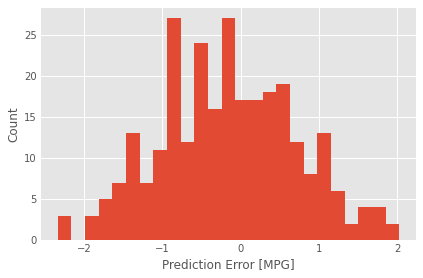

In [229]:
error1 = test_predictions1 - y_test
plt.hist(error1, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [230]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [231]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [232]:
models_path = '../models/'
dnn_model1.save(models_path + '/model1/')

INFO:tensorflow:Assets written to: ../models//model1/assets


In [233]:
model1_dnn = keras.models.load_model(models_path + '/model1/')
model1_dnn